# Import delle Librerie

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime
import squarify
from pySankey.sankey import sankey

In [3]:
europa = pd.read_csv('Europa.csv')
africa = pd.read_csv('Africa.csv')
oceania = pd.read_csv('Oceania.csv')
america = pd.read_csv('America.csv')
asia = pd.read_csv('Asia.csv')

In [5]:
europa.insert(len(europa.keys()), "Continent", pd.Series(['Europa' for x in range(len(europa['Area']))]), True)
africa.insert(len(africa.keys()), "Continent", pd.Series(['Africa' for x in range(len(africa['Area']))]), True)
oceania.insert(len(oceania.keys()), "Continent", pd.Series(['Oceania' for x in range(len(oceania['Area']))]), True)
america.insert(len(america.keys()), "Continent", pd.Series(['America' for x in range(len(america['Area']))]), True)
asia.insert(len(asia.keys()), "Continent", pd.Series(['Asia' for x in range(len(asia['Area']))]), True)

In [6]:
allFile = pd.concat([europa,africa,oceania,america,africa,asia])

In [7]:
allFile['Domain'].unique()

array(['Producer Prices'], dtype=object)

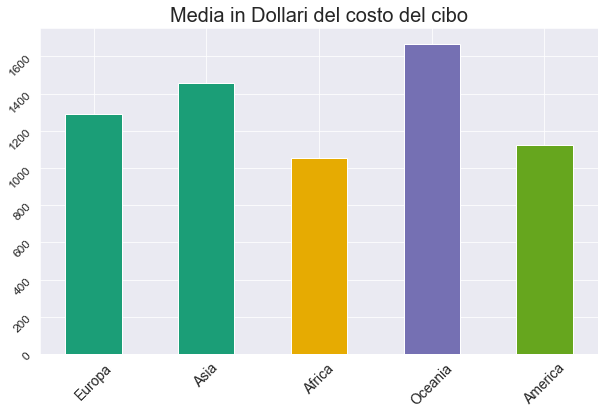

In [24]:
avg = [europa['Value'].mean(),asia['Value'].mean(),africa['Value'].mean(),oceania['Value'].mean(),america['Value'].mean()]
bars = ('Europa', 'Asia', 'Africa', 'Oceania', 'America')

fig, ax = plt.subplots(figsize = (10,6))

y_pos = np.arange(len(bars))
width = 0.5

palette = sns.color_palette("Dark2",9)
colors = [palette[0],palette[8],palette[5],palette[2],palette[4]]
plt.bar(y_pos, avg, width, color=colors)
plt.xticks(y_pos, bars, rotation=45,fontsize=14)
plt.yticks(rotation=45,fontsize=12)

plt.title('Media in Dollari del costo del cibo',fontsize=20)


plt.show()

In [25]:
len(europa['Item'].unique())
allAvgEuropa = []
for el in europa[europa.Year == 2020]['Item'].unique():
    allAvgEuropa.append(europa[europa.Item == el ]['Value'].mean())

In [26]:
# Build a dataset
df = pd.DataFrame(
        {
            'Name': europa[europa.Year == 2020]['Item'].unique(),
            'Value': allAvgEuropa
        })

# Show 3 first rows
#df.head(3)
europa[europa.Item == 'Apples']

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description,Continent
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2000,2000,7021,Annual value,USD,257,NaN,Official data,Europa
34,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2001,2001,7021,Annual value,USD,258,NaN,Official data,Europa
68,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2002,2002,7021,Annual value,USD,275,NaN,Official data,Europa
102,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2003,2003,7021,Annual value,USD,318,NaN,Official data,Europa
136,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,2004,2004,7021,Annual value,USD,376,NaN,Official data,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107189,PP,Producer Prices,249,Yemen,5532,Producer Price (USD/tonne),515,Apples,2019,2019,7021,Annual value,USD,1626,NaN,Official data,Europa
107228,PP,Producer Prices,249,Yemen,5532,Producer Price (USD/tonne),515,Apples,2020,2020,7021,Annual value,USD,1614,NaN,Official data,Europa
107478,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),515,Apples,2015,2015,7021,Annual value,USD,1897,NaN,Official data,Europa
107519,PP,Producer Prices,181,Zimbabwe,5532,Producer Price (USD/tonne),515,Apples,2016,2016,7021,Annual value,USD,1789,NaN,Official data,Europa


In [27]:
europa[europa.Area == 'Italy']['Item'].unique()

array(['Artichokes', 'Barley', 'Cabbages and other brassicas',
       'Eggs, hen, in shell', 'Maize', 'Meat live weight, horse',
       'Mushrooms and truffles', 'Oats', 'Peas, dry', 'Rice, paddy',
       'Walnuts, with shell', 'Wheat', 'Wool, greasy', 'Apples',
       'Beans, dry', 'Beans, green', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cherries', 'Grapes',
       'Hazelnuts, with shell', 'Honey, natural', 'Lemons and limes',
       'Meat live weight, cattle', 'Meat live weight, pig',
       'Meat live weight, rabbit', 'Meat live weight, sheep',
       'Milk, whole fresh cow', 'Olives', 'Onions, shallots, green',
       'Oranges', 'Peaches and nectarines', 'Pears', 'Peas, green',
       'Potatoes', 'Pumpkins, squash and gourds', 'Rapeseed', 'Rye',
       'Soybeans', 'Strawberries', 'Sugar beet', 'Sunflower seed',
       'Tangerines, mandarins, clementines, satsumas',
       'Tobacco, unmanufactured', 'Tomatoes', 'Meat live weight, chicken',
       'Almonds, with sh

In [35]:
file = pd.read_csv('FAOSTAT_data_5-10-2022.csv')
file[file.Area == 'Italy']['Item'].unique()

array(['Artichokes', 'Barley', 'Cabbages and other brassicas',
       'Eggs, hen, in shell', 'Maize', 'Meat live weight, horse',
       'Mushrooms and truffles', 'Oats', 'Peas, dry', 'Rice, paddy',
       'Walnuts, with shell', 'Wheat', 'Wool, greasy', 'Apples',
       'Beans, dry', 'Beans, green', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cherries', 'Grapes',
       'Hazelnuts, with shell', 'Honey, natural', 'Lemons and limes',
       'Meat live weight, cattle', 'Meat live weight, pig',
       'Meat live weight, rabbit', 'Meat live weight, sheep',
       'Milk, whole fresh cow', 'Olives', 'Onions, shallots, green',
       'Oranges', 'Peaches and nectarines', 'Pears', 'Peas, green',
       'Potatoes', 'Pumpkins, squash and gourds', 'Rapeseed', 'Rye',
       'Soybeans', 'Strawberries', 'Sugar beet', 'Sunflower seed',
       'Tangerines, mandarins, clementines, satsumas',
       'Tobacco, unmanufactured', 'Tomatoes', 'Meat live weight, chicken',
       'Almonds, with sh

In [36]:
italy = file[file.Area == 'Italy']
france = file[file.Area == 'France']
spain = file[file.Area == 'Spain']
germany = file[file.Area == 'Germany']
italyMaize = italy[italy.Item == 'Maize']
franceMaize = france[france.Item == 'Maize']
spainMaize = spain[spain.Item == 'Maize']
germanyMaize = germany[germany.Item == 'Maize']

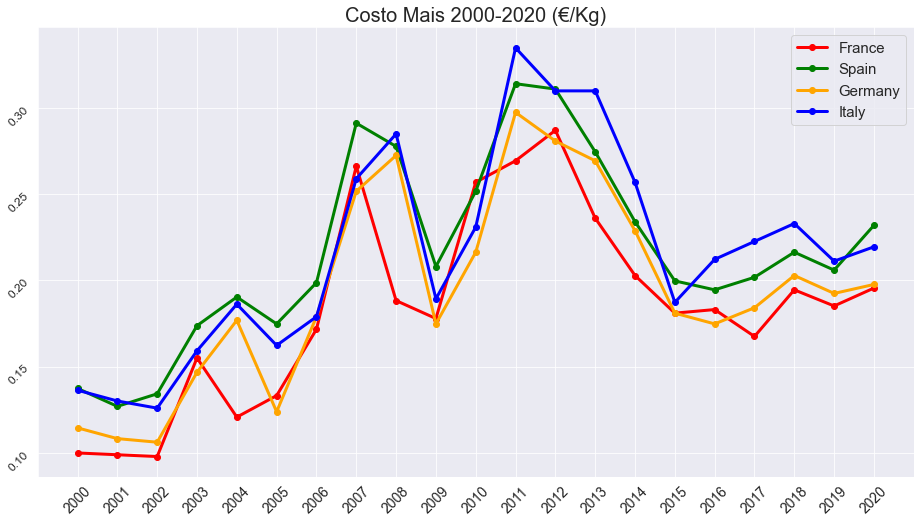

In [37]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15.7,8.27


italyMaizeDf = pd.DataFrame({
  'x_axis': (str(x) for x in italyMaize['Year']),
  'y_axis': (x/1000 * 1.04 for x in italyMaize['Value'])
})

franceMaizeDf = pd.DataFrame({
  'x_axis': (str(x) for x in franceMaize['Year']),
  'y_axis': (x/1000 * 1.04 for x in franceMaize['Value'])
})

spainMaizeDf = pd.DataFrame({
  'x_axis': (str(x) for x in spainMaize['Year']),
  'y_axis': (x/1000 * 1.04 for x in spainMaize['Value'])
})

germanyMaizeDf = pd.DataFrame({
  'x_axis': (str(x) for x in germanyMaize['Year']),
  'y_axis': (x/1000 * 1.04 for x in germanyMaize['Value'])
})


plt.plot('x_axis', 'y_axis', data=franceMaizeDf, linestyle='-',linewidth=3, marker='o',color='Red',label='France')
plt.plot('x_axis', 'y_axis', data=spainMaizeDf, linestyle='-',linewidth=3, marker='o',color='Green',label='Spain')
plt.plot('x_axis', 'y_axis', data=germanyMaizeDf, linestyle='-',linewidth=3, marker='o',color='Orange',label='Germany')    
plt.plot('x_axis', 'y_axis', data=italyMaizeDf, linestyle='-',linewidth=3, marker='o',color='Blue',label='Italy')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(fontsize=15)
plt.title('Costo Mais 2000-2020 (€/Kg)',fontsize=20)
plt.show()

In [38]:
italyPotatoes = italy[italy.Item == 'Potatoes']
francePotatoes = france[france.Item == 'Potatoes']
spainPotatoes = spain[spain.Item == 'Potatoes']
germanyPotatoes = germany[germany.Item == 'Potatoes']

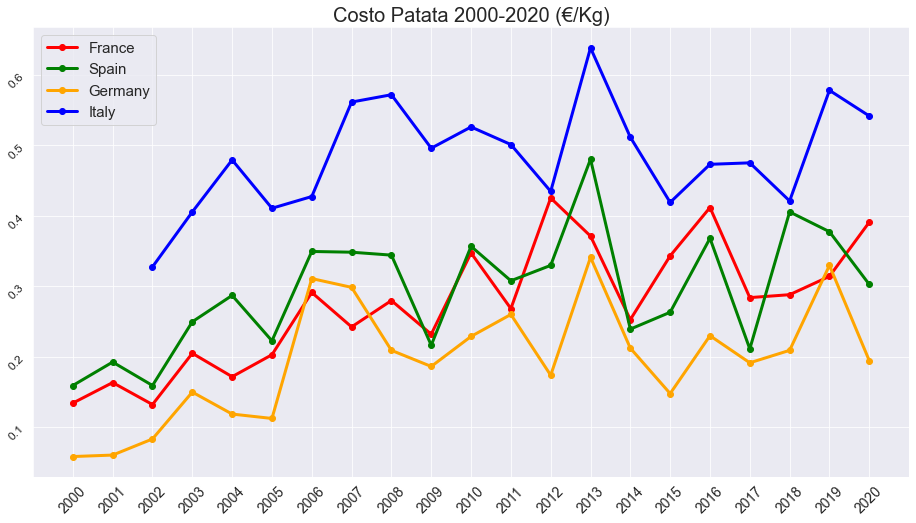

In [39]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15.7,8.27


italyPotatoesDf = pd.DataFrame({
  'x_axis': (str(x) for x in italyPotatoes['Year']),
  'y_axis': (x/1000 * 1.04 for x in italyPotatoes['Value'])
})

francePotatoesDf = pd.DataFrame({
  'x_axis': (str(x) for x in francePotatoes['Year']),
  'y_axis': (x/1000 * 1.04 for x in francePotatoes['Value'])
})

spainPotatoesDf = pd.DataFrame({
  'x_axis': (str(x) for x in spainPotatoes['Year']),
  'y_axis': (x/1000 * 1.04 for x in spainPotatoes['Value'])
})

germanyPotatoesDf = pd.DataFrame({
  'x_axis': (str(x) for x in germanyPotatoes['Year']),
  'y_axis': (x/1000 * 1.04 for x in germanyPotatoes['Value'])
})


plt.plot('x_axis', 'y_axis', data=francePotatoesDf, linestyle='-',linewidth=3, marker='o',color='Red',label='France')
plt.plot('x_axis', 'y_axis', data=spainPotatoesDf, linestyle='-',linewidth=3, marker='o',color='Green',label='Spain')
plt.plot('x_axis', 'y_axis', data=germanyPotatoesDf, linestyle='-',linewidth=3, marker='o',color='Orange',label='Germany')    
plt.plot('x_axis', 'y_axis', data=italyPotatoesDf, linestyle='-',linewidth=3, marker='o',color='Blue',label='Italy')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(fontsize=15)
plt.title('Costo Patata 2000-2020 (€/Kg)',fontsize=20)
plt.show()

In [40]:
file[file.Item == 'Wheat']['Area'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi',
       'Canada', 'Chad', 'Chile', 'China, mainland', 'Colombia',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt',
       'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Niger', 'Nigeria',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palestine',
       'Paraguay', 'Peru', 'Poland', 'Portug

In [41]:
italyWheat = italy[italy.Item == 'Wheat']
franceWheat = france[france.Item == 'Wheat']
spainWheat = spain[spain.Item == 'Wheat']
germanyWheat = germany[germany.Item == 'Wheat']

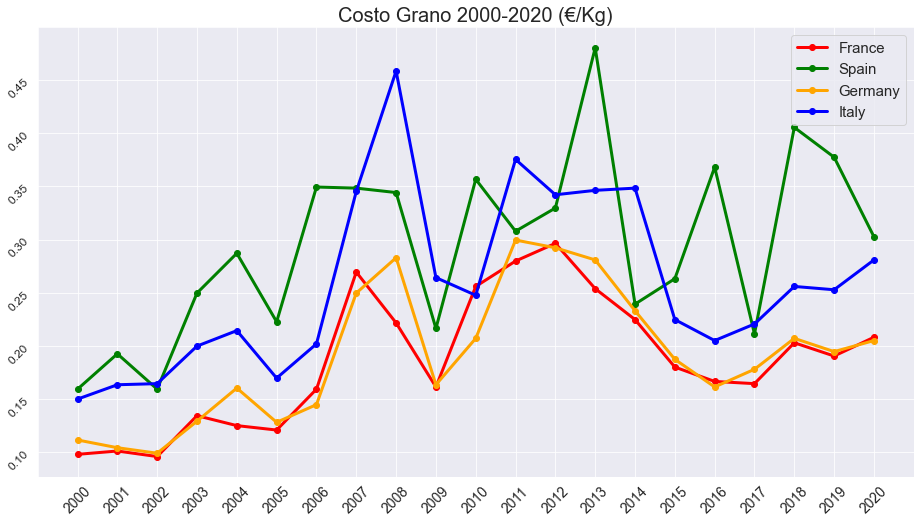

In [42]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15.7,8.27


italyWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in italyWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in italyWheat['Value'])
})

franceWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in franceWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in franceWheat['Value'])
})

spainWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in spainWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in spainWheat['Value'])
})

germanyWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in germanyWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in germanyWheat['Value'])
})


plt.plot('x_axis', 'y_axis', data=franceWheatDf, linestyle='-',linewidth=3, marker='o',color='Red',label='France')
plt.plot('x_axis', 'y_axis', data=spainPotatoesDf, linestyle='-',linewidth=3, marker='o',color='Green',label='Spain')
plt.plot('x_axis', 'y_axis', data=germanyWheatDf, linestyle='-',linewidth=3, marker='o',color='Orange',label='Germany')    
plt.plot('x_axis', 'y_axis', data=italyWheatDf, linestyle='-',linewidth=3, marker='o',color='Blue',label='Italy')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(fontsize=15)
plt.title('Costo Grano 2000-2020 (€/Kg)',fontsize=20)
plt.show()

In [43]:
russian = file[file.Area == 'Russian Federation']
ukraine = file[file.Area == 'Ukraine']
russianWheat = russian[russian.Item == 'Wheat']
ukraineWheat = ukraine[ukraine.Item == 'Wheat']

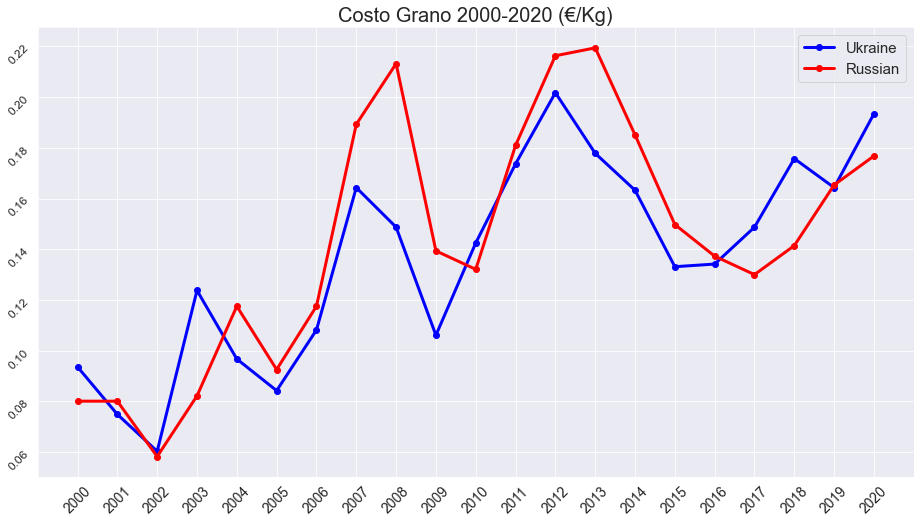

In [44]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15.7,8.27


russianWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in russianWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in russianWheat['Value'])
})

ukraineWheatDf = pd.DataFrame({
  'x_axis': (str(x) for x in ukraineWheat['Year']),
  'y_axis': (x/1000 * 1.04 for x in ukraineWheat['Value'])
})

plt.plot('x_axis', 'y_axis', data=ukraineWheatDf, linestyle='-',linewidth=3, marker='o',color='Blue',label='Ukraine')
plt.plot('x_axis', 'y_axis', data=russianWheatDf, linestyle='-',linewidth=3, marker='o',color='Red',label='Russian')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(fontsize=15)
plt.title('Costo Grano 2000-2020 (€/Kg)',fontsize=20)
plt.show()

In [45]:
grano = file[file.Item == 'Grain, mixed']
grano

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
22666,PP,Producer Prices,98,Croatia,5532,Producer Price (USD/tonne),103,"Grain, mixed",2000,2000,7021,Annual value,USD,64,NaN,Official data
22730,PP,Producer Prices,98,Croatia,5532,Producer Price (USD/tonne),103,"Grain, mixed",2001,2001,7021,Annual value,USD,132,NaN,Official data
22794,PP,Producer Prices,98,Croatia,5532,Producer Price (USD/tonne),103,"Grain, mixed",2002,2002,7021,Annual value,USD,119,NaN,Official data
22859,PP,Producer Prices,98,Croatia,5532,Producer Price (USD/tonne),103,"Grain, mixed",2003,2003,7021,Annual value,USD,159,NaN,Official data
31071,PP,Producer Prices,63,Estonia,5532,Producer Price (USD/tonne),103,"Grain, mixed",2000,2000,7021,Annual value,USD,75,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98137,PP,Producer Prices,223,Turkey,5532,Producer Price (USD/tonne),103,"Grain, mixed",2005,2005,7021,Annual value,USD,260,NaN,Official data
98227,PP,Producer Prices,223,Turkey,5532,Producer Price (USD/tonne),103,"Grain, mixed",2006,2006,7021,Annual value,USD,266,NaN,Official data
98317,PP,Producer Prices,223,Turkey,5532,Producer Price (USD/tonne),103,"Grain, mixed",2007,2007,7021,Annual value,USD,322,NaN,Official data
98405,PP,Producer Prices,223,Turkey,5532,Producer Price (USD/tonne),103,"Grain, mixed",2008,2008,7021,Annual value,USD,365,NaN,Official data


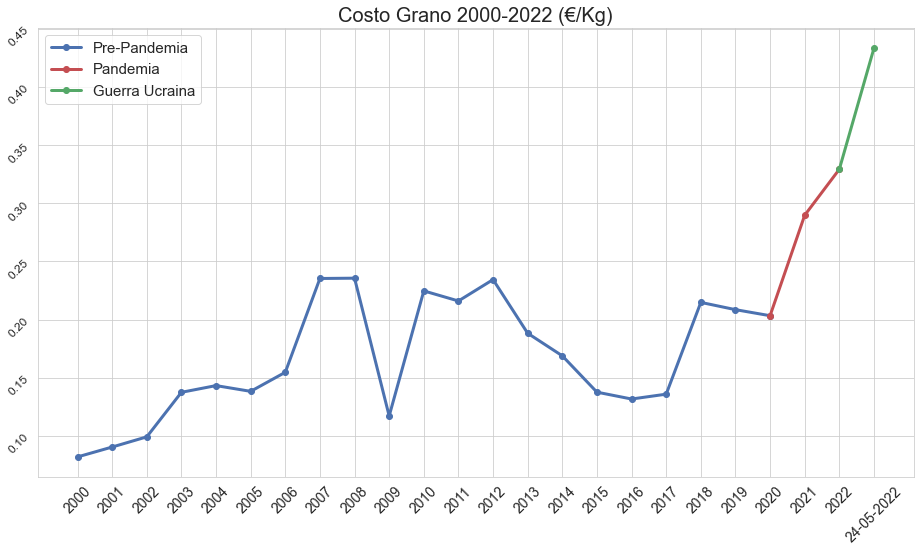

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [70]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15.7,8.27

avg = []
for el in grano['Year'].unique():
    avg.append(grano[grano.Year == el]['Value'].mean()/1000 * 1.04)

avg2 = []

avg2.append(avg[len(avg)-1])
avg2.append(278.5/1000 * 1.04)
avg2.append(316.5/1000 * 1.04)

avg3 = []
avg3.append(avg2[len(avg2)-1])
avg3.append(416.5/1000 * 1.04)

year2 = [2020,2021,2022]
year3 = [2022,'24-05-2022']

granoDf = pd.DataFrame({
  'x_axis': (str(x) for x in grano['Year'].unique()),
  'y_axis': avg
})
grano2Df = pd.DataFrame({
  'x_axis': (str(x) for x in year2),
  'y_axis': avg2
})
grano3Df = pd.DataFrame({
  'x_axis': (str(x) for x in year3),
  'y_axis': avg3
})

sns.set_style("whitegrid")

colors = sns.color_palette('deep')
plt.plot('x_axis', 'y_axis', data=granoDf, linestyle='-',linewidth=3, marker='o',color=colors[0],label='Pre-Pandemia')
plt.plot('x_axis', 'y_axis', data=grano2Df, linestyle='-',linewidth=3, marker='o',color=colors[3],label='Pandemia')
plt.plot('x_axis', 'y_axis', data=grano3Df, linestyle='-',linewidth=3, marker='o',color=colors[2],label='Guerra Ucraina')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(fontsize=15)
#plt.grid()
plt.title('Costo Grano 2000-2022 (€/Kg)',fontsize=20)
plt.show()
colors

In [76]:
fileGrano = pd.read_csv('Grain_Inspections.csv')
fileGrano

,Date,Week,Month,Quarter,Year,Type_Shipm,Type_Carrier,Carrier_Name,Grain,Class,SubClass,Destination,Port,AMS_Reg,FGIS_Reg,State,MT,Pounds,Field_Office;;;
0,01/06/1983,1.0,1.0,1.0,1983.0,BU,1.0,PRINT MARATER,CORN,YC,NaN,EGYPT,N. ATLANTIC,ATLANTIC,EAST COAST,NaN,18495.0,40774000.0,PHILADELPHIA;;;
1,01/06/1983,1.0,1.0,1.0,1983.0,BU,1.0,ZHAR YANG HAI,CORN,YC,NaN,CHINA,N. ATLANTIC,ATLANTIC,EAST COAST,NaN,28291.0,62370000.0,PHILADELPHIA;;;
2,01/06/1983,1.0,1.0,1.0,1983.0,BU,1.0,CAST BEAVER,CORN,YC,NaN,GERM DR (E),S. ATLANTIC,ATLANTIC,EAST COAST,NaN,44200.0,97445000.0,BALTIMORE;;;
3,01/06/1983,1.0,1.0,1.0,1983.0,BU,1.0,MARITIME KING,CORN,YC,NaN,BELGIUM,S. ATLANTIC,ATLANTIC,EAST COAST,NaN,54785.0,120781000.0,BALTIMORE;;;
4,01/06/1983,1.0,1.0,1.0,1983.0,BU,1.0,BRITSUM,CORN,YC,NaN,USSR,S. ATLANTIC,ATLANTIC,EAST COAST,NaN,38872.0,85697000.0,BALTIMORE;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486615,05/05/2022,18.0,5.0,2.0,2022.0,SA,6.0,2131659290,CORN,YC,NaN,PHILIPPINES,INTERIOR,INTERIOR,INTERIOR,IA,98.0,216000.0,DIOO;;;
486616,05/05/2022,18.0,5.0,2.0,2022.0,BU,6.0,2131499110A,SOYBEANS,YSB,NaN,PHILIPPINES,INTERIOR,INTERIOR,INTERIOR,IL,98.0,216000.0,DIOO;;;
486617,05/05/2022,18.0,5.0,2.0,2022.0,BU,6.0,6333658160,SOYBEANS,YSB,NaN,MALAYSIA,INTERIOR,INTERIOR,INTERIOR,IL,196.0,432000.0,DIOO;;;
486618,05/05/2022,18.0,5.0,2.0,2022.0,BU,6.0,RICCE5675800,SOYBEANS,YSB,NaN,CHINA,INTERIOR,INTERIOR,INTERIOR,IL,147.0,324000.0,DIOO;;;


In [77]:
allDate = []
for el in range(len(fileGrano['Date'])):
    allDate.append(fileGrano['Date'][el][6:])

In [78]:
fileGrano['Date'] = allDate
fileGrano['Date']

0         1983
1         1983
2         1983
3         1983
4         1983
          ... 
486615    2022
486616    2022
486617    2022
486618    2022
486619    2022
Name: Date, Length: 486620, dtype: object

In [87]:
fileGranoUE = pd.read_csv('DatiUnioneEuropea.csv', sep=';')
fileGranoUE

,Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Totals,260.276,270.824,261.689,286.120,306.219,289.709,277.371,284.967,271.272,297.060,283.821,295.685,298.376
1,Soft wheat,112.969,115.885,112.652,124.300,133.042,136.106,120.641,128.306,115.751,132.156,119.270,131.040,131.090
2,Durum wheat,9.443,8.583,8.414,8.054,7.698,8.388,9.675,8.810,8.767,7.476,7.420,7.809,7.630
3,Maize,59.944,70.696,59.529,66.973,77.736,59.239,62.963,65.049,69.309,70.416,68.252,72.561,73.743
4,Barley,47.858,46.372,49.480,52.762,53.770,54.607,53.324,51.650,49.931,55.514,54.420,52.418,53.931
5,Triticale,10.681,10.074,10.051,11.421,13.126,12.676,11.785,11.646,9.770,11.203,12.337,11.778,11.237
6,Oat,6.752,7.242,7.300,7.432,6.947,6.784,7.321,7.322,6.887,6.945,8.473,7.554,7.594
7,Rye,7.694,6.782,8.679,10.417,8.994,7.739,7.349,7.309,6.174,8.455,8.910,7.944,8.231
8,Sorghum,614.000,679.000,497.000,729.000,932.000,720.000,688.000,719.000,833.000,1.016,1.126,841.000,878.000
9,Other cereals,4.320,4.511,5.088,4.032,3.974,3.450,3.625,4.158,3.851,3.879,3.614,3.739,4.043


In [88]:
newFileGranoUE = pd.DataFrame()
newFileGranoUE['Years'] = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for el in fileGranoUE['Type']:
    newFileGranoUE[el] = ""

In [89]:
newFileGranoUE

,Years,Totals,Soft wheat,Durum wheat,Maize,Barley,Triticale,Oat,Rye,Sorghum,Other cereals
0,2010,,,,,,,,,,
1,2011,,,,,,,,,,
2,2012,,,,,,,,,,
3,2013,,,,,,,,,,
4,2014,,,,,,,,,,
5,2015,,,,,,,,,,
6,2016,,,,,,,,,,
7,2017,,,,,,,,,,
8,2018,,,,,,,,,,
9,2019,,,,,,,,,,


In [90]:
index = 1
#print(newFileGranoUE.keys()[1])
for v in fileGranoUE.values:
    newFileGranoUE[newFileGranoUE.keys()[index]] = v[1:]
    print(newFileGranoUE.keys()[index])
    index += 1

Totals
Soft wheat
Durum wheat
Maize
Barley
Triticale
Oat
Rye
Sorghum
Other cereals


In [91]:
newFileGranoUE

,Years,Totals,Soft wheat,Durum wheat,Maize,Barley,Triticale,Oat,Rye,Sorghum,Other cereals
0,2010,260.276,112.969,9.443,59.944,47.858,10.681,6.752,7.694,614.0,4.32
1,2011,270.824,115.885,8.583,70.696,46.372,10.074,7.242,6.782,679.0,4.511
2,2012,261.689,112.652,8.414,59.529,49.48,10.051,7.3,8.679,497.0,5.088
3,2013,286.12,124.3,8.054,66.973,52.762,11.421,7.432,10.417,729.0,4.032
4,2014,306.219,133.042,7.698,77.736,53.77,13.126,6.947,8.994,932.0,3.974
5,2015,289.709,136.106,8.388,59.239,54.607,12.676,6.784,7.739,720.0,3.45
6,2016,277.371,120.641,9.675,62.963,53.324,11.785,7.321,7.349,688.0,3.625
7,2017,284.967,128.306,8.81,65.049,51.65,11.646,7.322,7.309,719.0,4.158
8,2018,271.272,115.751,8.767,69.309,49.931,9.77,6.887,6.174,833.0,3.851
9,2019,297.06,132.156,7.476,70.416,55.514,11.203,6.945,8.455,1.016,3.879


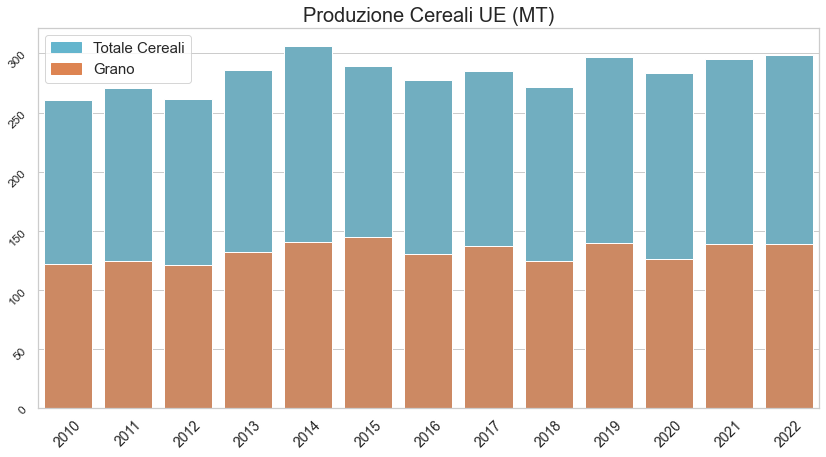

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [178]:
plt.figure(figsize=(14, 7))

#plt.grid()
sns.set_style("whitegrid")

color = sns.color_palette("deep")
bar1 = sns.barplot(x="Years",  y="Totals", data=newFileGranoUE, color=color[9])

wheatTot = []
for el in range(len(newFileGranoUE['Soft wheat'])):
    wheatTot.append(newFileGranoUE['Soft wheat'][el] + newFileGranoUE['Durum wheat'][el])
    
newDF = pd.DataFrame({
    'Years' :  newFileGranoUE['Years'],
    'Value' : wheatTot
})
bar2 = sns.barplot(x="Years", y='Value', data=newDF, color=color[1])

tot = mpatches.Patch(color=color[9], label='Totale Cereali')
wheatA = mpatches.Patch(color=color[1], label='Grano')

plt.title('Produzione Cereali UE (MT)',fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.legend(handles=[tot, wheatA],fontsize=15)

plt.show()
colors

<AxesSubplot:xlabel='Grain', ylabel='Pounds'>

findfont: Font family ['Oswald'] not found. Falling back to DejaVu Sans.


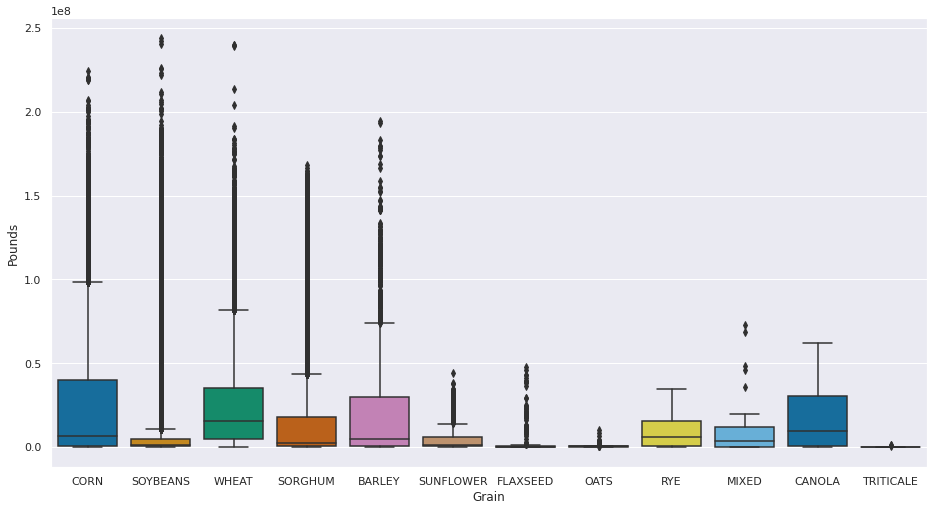

In [152]:
sns.boxplot( x=fileGrano['Grain'], y=fileGrano["Pounds"], palette='colorblind' )

In [153]:
len(fileGranoUE['Type'])

10

In [154]:
newFileGranoUE = newFileGranoUE.set_index('Years')

In [155]:
column_names = ["Type", "Year", "Number"]
fileGranoBoxPlot = pd.DataFrame(columns = column_names)
for t in fileGranoUE['Type']:
    for y in newFileGranoUE.index:
        data = {
            'Type': [t],
            'Year': [y],
            'Number': newFileGranoUE.loc[y][t]
        }
        df2 = pd.DataFrame(data)
        fileGranoBoxPlot = pd.concat([fileGranoBoxPlot,df2],ignore_index=True,axis=0)
        print(data)

{'Type': ['Totals'], 'Year': [2010], 'Number': 260.276}
{'Type': ['Totals'], 'Year': [2011], 'Number': 270.824}
{'Type': ['Totals'], 'Year': [2012], 'Number': 261.689}
{'Type': ['Totals'], 'Year': [2013], 'Number': 286.12}
{'Type': ['Totals'], 'Year': [2014], 'Number': 306.219}
{'Type': ['Totals'], 'Year': [2015], 'Number': 289.709}
{'Type': ['Totals'], 'Year': [2016], 'Number': 277.371}
{'Type': ['Totals'], 'Year': [2017], 'Number': 284.967}
{'Type': ['Totals'], 'Year': [2018], 'Number': 271.272}
{'Type': ['Totals'], 'Year': [2019], 'Number': 297.06}
{'Type': ['Totals'], 'Year': [2020], 'Number': 283.821}
{'Type': ['Totals'], 'Year': [2021], 'Number': 295.685}
{'Type': ['Totals'], 'Year': [2022], 'Number': 298.376}
{'Type': ['Soft wheat'], 'Year': [2010], 'Number': 112.969}
{'Type': ['Soft wheat'], 'Year': [2011], 'Number': 115.885}
{'Type': ['Soft wheat'], 'Year': [2012], 'Number': 112.652}
{'Type': ['Soft wheat'], 'Year': [2013], 'Number': 124.3}
{'Type': ['Soft wheat'], 'Year': [20

In [156]:
fileGranoBoxPlot

,Type,Year,Number
0,Totals,2010,260.276
1,Totals,2011,270.824
2,Totals,2012,261.689
3,Totals,2013,286.12
4,Totals,2014,306.219
...,...,...,...
125,Other cereals,2018,3.851
126,Other cereals,2019,3.879
127,Other cereals,2020,3.614
128,Other cereals,2021,3.739


In [157]:
fileGranoUE['Type']

0           Totals
1       Soft wheat
2      Durum wheat
3            Maize
4           Barley
5        Triticale
6              Oat
7              Rye
8          Sorghum
9    Other cereals
Name: Type, dtype: object

In [158]:
newFileGranoUE.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021, 2022],
           dtype='int64', name='Years')

<AxesSubplot:xlabel='Type', ylabel='Number'>

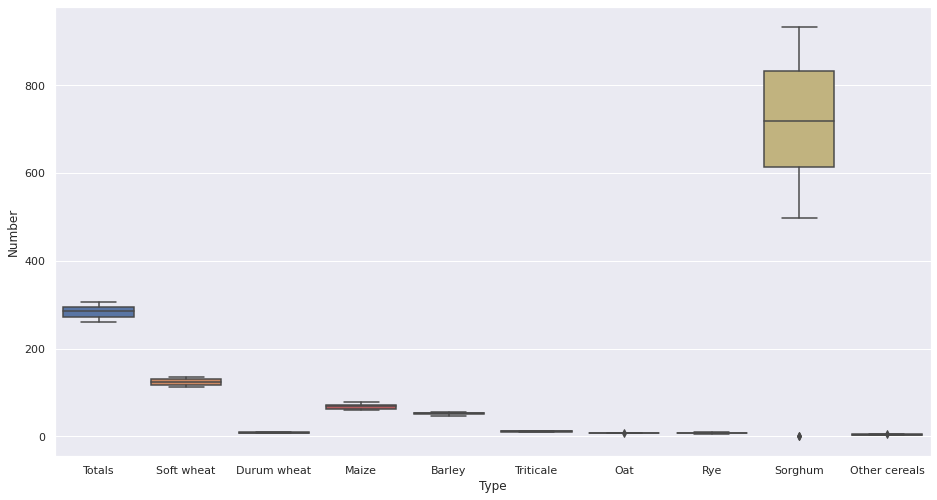

In [159]:
sns.boxplot(x=fileGranoBoxPlot['Type'], y=fileGranoBoxPlot["Number"])

In [160]:
fileGranoBoxPlot[fileGranoBoxPlot.Type == 'Sorghum']

,Type,Year,Number
104,Sorghum,2010,614.0
105,Sorghum,2011,679.0
106,Sorghum,2012,497.0
107,Sorghum,2013,729.0
108,Sorghum,2014,932.0
109,Sorghum,2015,720.0
110,Sorghum,2016,688.0
111,Sorghum,2017,719.0
112,Sorghum,2018,833.0
113,Sorghum,2019,1.016


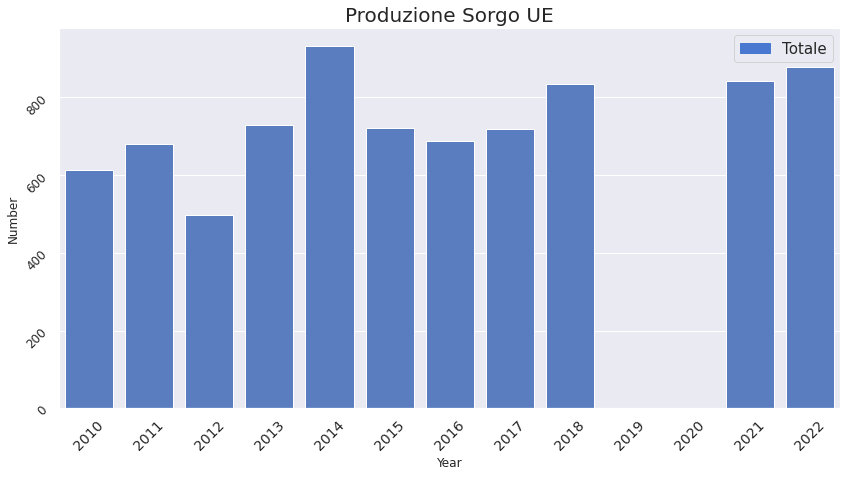

In [161]:
plt.figure(figsize=(14, 7))

color = sns.color_palette("muted")
bar1 = sns.barplot(x="Year",  y="Number", data=fileGranoBoxPlot[fileGranoBoxPlot.Type == 'Sorghum'], color=color[0])

first = mpatches.Patch(color=color[0], label='Totale')
plt.title('Produzione Sorgo UE',fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend(handles=[first],fontsize=15)

# show the graph
plt.show()

In [93]:
fileCarestie = pd.read_csv('Dataset carestie nel mondo.csv',sep=";")
fileCarestie

,Paese,2000,2006,2012,2021
0,Argentina,6.4,5.6,5.2,5.3
1,Costa Rica,7.0,5.5,4.9,5.3
2,Uzbekistan,24.3,16.6,9.5,5.9
3,Tunisia,10.3,7.8,7.0,6.0
4,Bulgaria,8.6,8.1,7.8,6.1
...,...,...,...,...,...
92,Madagascar,42.8,41.6,34.3,36.3
93,Rep. Dem. del Congo,50.6,45.3,42.3,39.0
94,Ciad,50.8,51.2,45.7,39.6
95,Repubblica Centrafricana,48.9,48.0,40.5,43.0


In [94]:
fileGranoRussia = pd.read_csv('RussiaCereali.csv')
fileGranoRussia

,Years,Tons
0,2000/01,69.09
1,2001/02,89.70
2,2002/03,98.12
3,2003/04,77.90
4,2004/05,83.46
5,2005/06,85.33
6,2006/07,85.70
7,2007/08,87.12
8,2008/09,114.77
9,2009/10,115.20


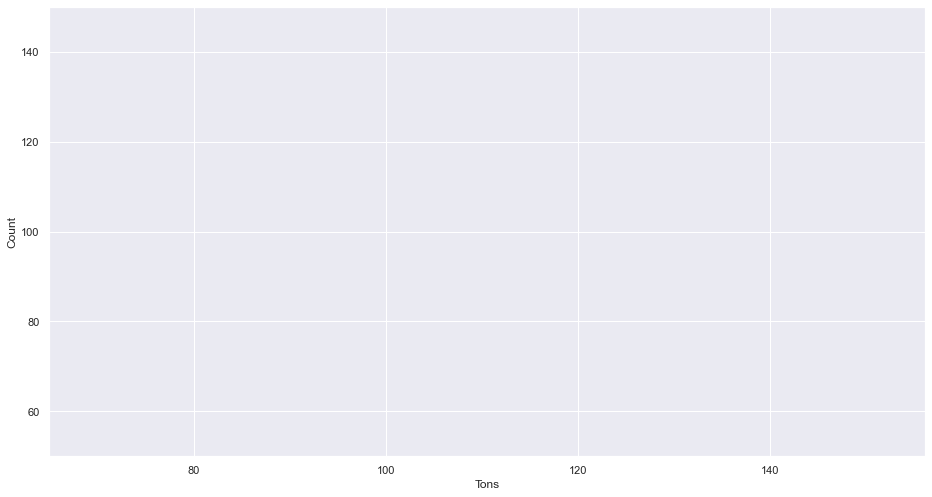

In [95]:
sns.set(style="darkgrid")
df = fileGranoRussia

sns.histplot(data=df, x="Tons", kde=True)
plt.ylim(50,150)
plt.show()

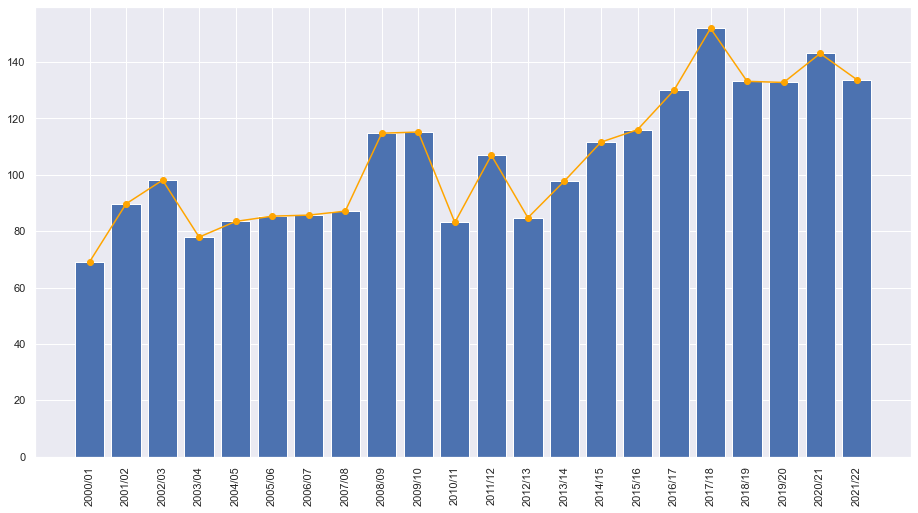

In [96]:
plt.bar(df['Years'], df['Tons'])
plt.xticks(rotation=90)
plt.plot(df['Years'], df['Tons'], '-o', color='orange')

RuntimeError: matplotlib does not support generators as input

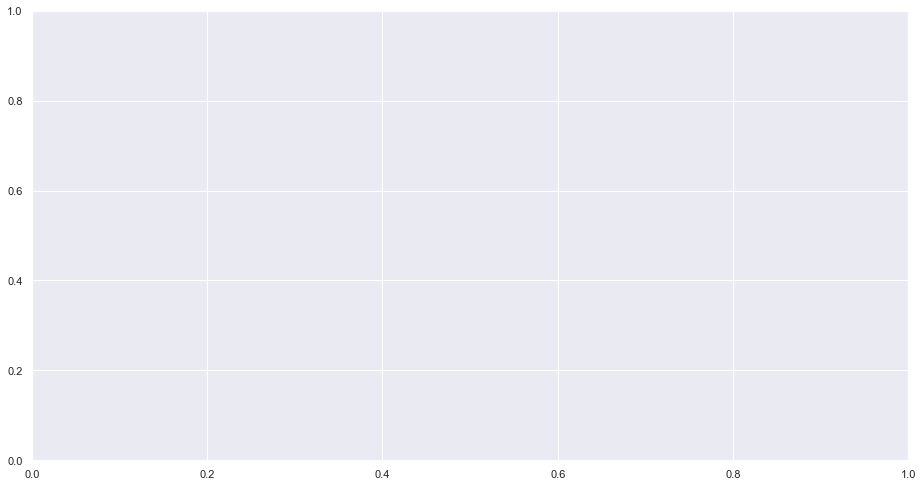

In [98]:
x = (int(x[:5]) for x in fileGranoRussia['Tons'])
y = fileGranoRussia['Years']

plt.scatter(x, y)

#z = np.polyfit(x, y, 2)
#p = np.poly1d(z)

#plt.plot(x, p(x))

/Users/andreacambiaghi/opt/anaconda3/envs/spyro/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


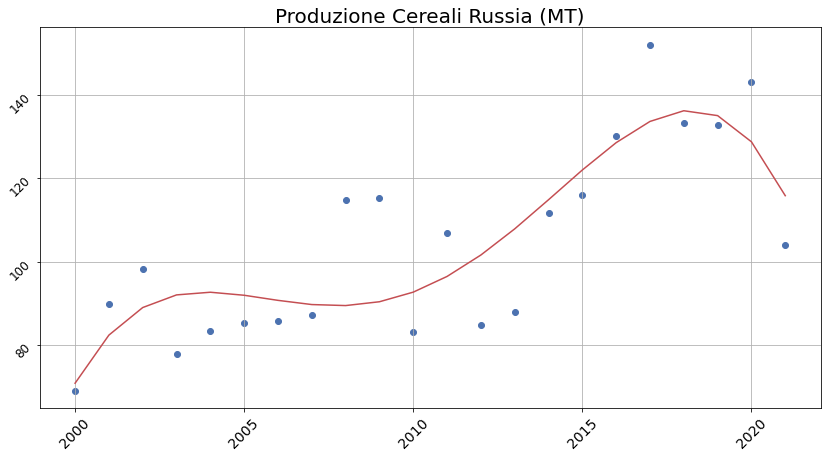

In [60]:
plt.figure(figsize=(14, 7))

plt.grid()


y = np.array([69.09,89.70,98.12,77.90,83.46,85.33,85.7,87.12,114.77,115.2,83.09,106.94,84.76,87.92,111.6,116.02,130.05,151.98,133.2,132.79,143.08,103.84])
x = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.scatter(x, y, color=colors[0])

z = np.polyfit(x, y, 5)
p = np.poly1d(z)

colors = sns.color_palette('deep')

plt.title('Produzione Cereali Russia (MT)',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
#plt.bar(x,y,color=colors[1])
plt.plot(x, p(x),color=colors[3])

In [6]:
fileImportGranoItaliaUcraina = pd.read_csv('ImportGranoItaliaUcraina.csv',sep=';')
fileImportGranoItaliaUcraina = fileImportGranoItaliaUcraina.set_index('Marketing Year')
fileImportGranoItaliaUcraina

,Total Marketing Year,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun
Marketing Year,,,,,,,,,,,,,
2021/2022,101548,12221,41498,11422,0,15045,0,0,21363,0,0,0,0
2020/2021,160596,24143,43245,33877,12417,5000,0,0,0,19800,6104,9666,6345
2019/2020,121462,4787,1487,0,0,0,0,26976,0,23070,19915,45226,0
2018/2019,243290,11906,14145,0,3,0,0,77415,53624,79628,0,0,6570
2017/2018,365877,67680,6503,2095,11570,5393,11520,78981,46875,102319,17745,9195,6000
2016/2017,422415,9158,23417,17277,0,4482,2964,123021,42271,109483,62844,12549,14950
2015/2016,621687,53654,146719,0,50761,28324,5085,43745,27565,78073,93325,39483,54952
2014/2015,433543,9081,53831,21198,52077,0,3132,31638,41124,72665,75977,22503,50317
2013/2014,239,0,0,0,0,0,0,219,0,0,20,0,0


In [5]:
fileImportGranoItaliaRussia = pd.read_csv('ImportGranoItaliaRussia.csv',sep=';')
fileImportGranoItaliaRussia = fileImportGranoItaliaRussia.set_index('Marketing Year')
fileImportGranoItaliaRussia

,Total Marketing Year,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun
Marketing Year,,,,,,,,,,,,,
2021/2022,157825,5500,500,27570,23413,43975,29309,13982,13577,0,0,0,0
2020/2021,83693,0,0,6416,25871,12213,15972,12642,10126,452,0,0,0
2019/2020,73329,3109,6574,5756,15605,100,6107,9286,0,5974,9443,9217,2157
2018/2019,110573,5875,7787,14321,11268,12888,6540,2617,4254,7681,7525,14587,15231
2017/2018,103442,7189,0,6218,7925,14430,8610,11781,5759,8552,8557,16038,8385
2016/2017,116658,16907,9047,11657,10882,9163,12587,8706,4085,4976,17016,6165,5466
2015/2016,155992,12581,8145,5031,8321,12778,12559,11017,10941,8656,12696,33967,19300
2014/2015,106534,5110,8095,8741,11062,8516,15415,16496,9016,2934,9114,6515,5520
2013/2014,79896,0,0,6337,4173,4501,378,5838,4534,12625,11716,17122,12672


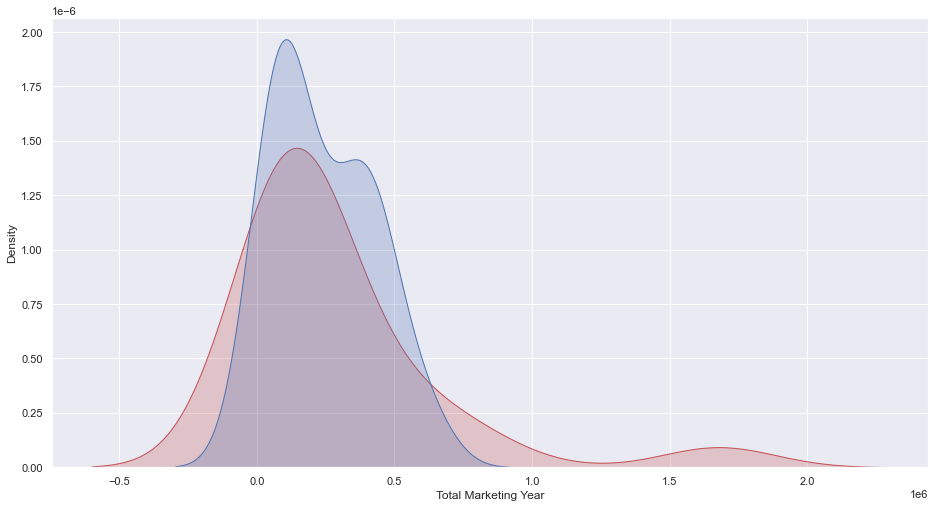

In [104]:
sns.set(style="darkgrid")
df1 = fileImportGranoItaliaRussia[::-1]
df2 = fileImportGranoItaliaUcraina[::-1]
 
fig = sns.kdeplot(df1['Total Marketing Year'], shade=True, color="r")
fig = sns.kdeplot(df2['Total Marketing Year'], shade=True, color="b")
plt.show()

In [4]:
fileImportGranoItalia = pd.read_csv('ImportGranoItalia.csv',sep=';')
fileImportGranoItalia = fileImportGranoItalia.set_index('Marketing Year')
fileImportGranoItalia

,Total Marketing Year,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun
Marketing Year,,,,,,,,,,,,,
2021/2022,1376778.0,245015.0,99979.0,204575.0,102587.0,261484.0,197832.0,146284.0,119021.0,0.0,0.0,0.0,0.0
2020/2021,2881538.0,268083.0,352889.0,198411.0,222111.0,125446.0,373331.0,322665.0,67741.0,76936.0,350375.0,250874.0,272674.0
2019/2020,2848005.0,90619.0,273320.0,263086.0,267642.0,131716.0,258340.0,455516.0,24851.0,159310.0,214825.0,441608.0,267171.0
2018/2019,2156410.0,67045.0,155416.0,239131.0,301574.0,154043.0,79830.0,259803.0,188268.0,167727.0,38973.0,179407.0,325195.0
2017/2018,2334407.0,203315.0,163172.0,352101.0,362644.0,196545.0,79499.0,218267.0,99862.0,135981.0,121671.0,131820.0,269532.0
2016/2017,2499349.0,116413.0,225085.0,210619.0,156832.0,167014.0,346854.0,346230.0,184413.0,211747.0,219099.0,177799.0,137243.0
2015/2016,3399873.0,249651.0,291825.0,322948.0,202959.0,233730.0,313953.0,250428.0,239471.0,381723.0,334371.0,231906.0,346907.0
2014/2015,3087819.0,271742.0,187861.0,184826.0,279420.0,303130.0,328682.0,334728.0,217633.0,147649.0,383884.0,213666.0,234598.0
2013/2014,2008404.0,165223.0,21105.0,191981.0,288789.0,125449.0,128513.0,182575.0,161180.0,190949.0,136367.0,215735.0,200537.0


In [3]:
fileProduzioneGranoItalia = pd.read_csv('ProduzioneItaliaGrano.csv',sep=';')
fileProduzioneGranoItalia

,Crop,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Totals,6777,6622,7654,7312,7142,7394,8038,6966,6933,6577,6554,6942,6556
1,Soft wheat,2953,2829,3494,3342,3106,2996,2989,2754,2788,2727,2669,2877,2522
2,Durum wheat,3824,3793,4160,3970,4036,4398,5049,4213,4145,3849,3885,4065,4034


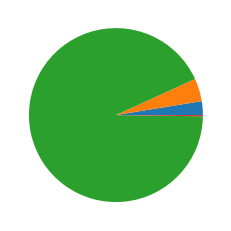

In [8]:
wheat2019 = [
    fileImportGranoItaliaRussia.loc['2019/2020']['Total Marketing Year'],
    fileImportGranoItaliaUcraina.loc['2019/2020']['Total Marketing Year'],
    (fileImportGranoItalia.loc['2019/2020']['Total Marketing Year'] - 
    fileImportGranoItaliaRussia.loc['2019/2020']['Total Marketing Year'] -
    fileImportGranoItaliaUcraina.loc['2019/2020']['Total Marketing Year']),
    fileProduzioneGranoItalia[fileProduzioneGranoItalia.Crop == 'Totals']['2019']
]
plt.pie(wheat2019)

plt.show()

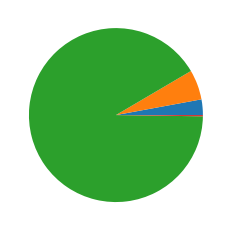

In [9]:
wheat2020 = [
    fileImportGranoItaliaRussia.loc['2020/2021']['Total Marketing Year'],
    fileImportGranoItaliaUcraina.loc['2020/2021']['Total Marketing Year'],
    (fileImportGranoItalia.loc['2020/2021']['Total Marketing Year'] - 
    fileImportGranoItaliaRussia.loc['2020/2021']['Total Marketing Year'] -
    fileImportGranoItaliaUcraina.loc['2020/2021']['Total Marketing Year']),
    fileProduzioneGranoItalia[fileProduzioneGranoItalia.Crop == 'Totals']['2020']
]
plt.pie(wheat2020)

plt.show()

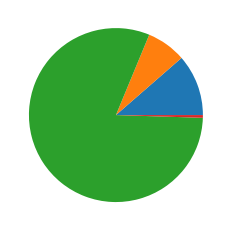

In [10]:
wheat2021 = [
    fileImportGranoItaliaRussia.loc['2021/2022']['Total Marketing Year'],
    fileImportGranoItaliaUcraina.loc['2021/2022']['Total Marketing Year'],
    (fileImportGranoItalia.loc['2021/2022']['Total Marketing Year'] - 
    fileImportGranoItaliaRussia.loc['2021/2022']['Total Marketing Year'] -
    fileImportGranoItaliaUcraina.loc['2021/2022']['Total Marketing Year']),
    fileProduzioneGranoItalia[fileProduzioneGranoItalia.Crop == 'Totals']['2021']
]
plt.pie(wheat2021)

plt.show()

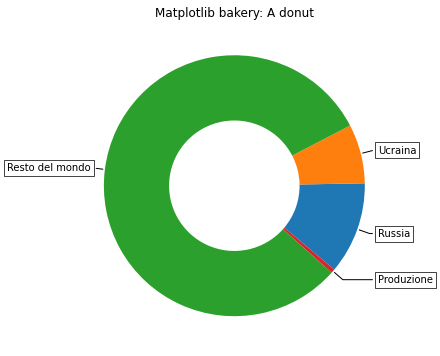

In [22]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

labels = ["Russia",
          "Ucraina",
          "Resto del mondo",
          "Produzione",]

data = wheat2021

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

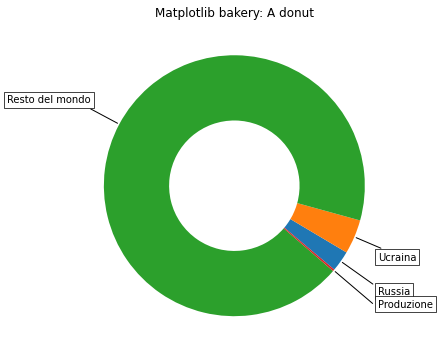

In [23]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

labels = ["Russia",
          "Ucraina",
          "Resto del mondo",
          "Produzione"]

data = wheat2019

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [67]:
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, wheat2021)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

TypeError: unsupported format string passed to Series.__format__

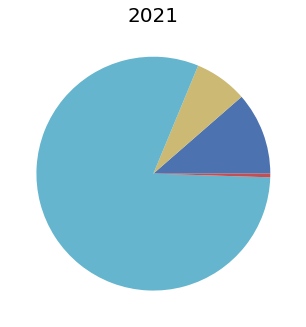

0    7.338768
Name: 2021, dtype: float64

In [11]:
fig, ax= plt.subplots(figsize=(7,7))
plt.subplots_adjust(bottom=0.3)
plt.title('2021',fontsize=20)

labels = ["Russia",
          "Ucraina",
          "Resto del mondo",
          "Produzione",]

colors = sns.color_palette('deep')
plt.pie(wheat2021, colors = [colors[0],colors[8],colors[9],colors[3]])

patch1 = mpatches.Patch(color=colors[0], label=labels[0])
patch2 = mpatches.Patch(color=colors[0], label=labels[1])
patch3 = mpatches.Patch(color=colors[0], label=labels[2])
patch4 = mpatches.Patch(color=colors[0], label=labels[3])

#ax.legend(handles=[patch1,patch2,patch3,patch4],loc="center", bbox_to_anchor=(1.15,0.80))
plt.show()

app = (wheat2021[1]/sum(wheat2021)*100)
app

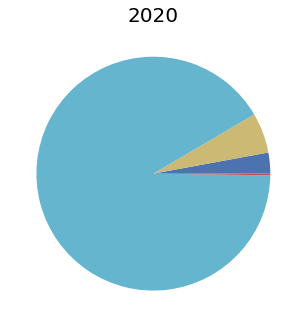

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [94]:
fig, ax= plt.subplots(figsize=(7,7))
plt.subplots_adjust(bottom=0.3)
plt.title('2020',fontsize=20)

labels = ["Russia",
          "Ucraina",
          "Resto del mondo",
          "Produzione",]

colors = sns.color_palette('deep')
plt.pie(wheat2020, colors = [colors[0],colors[8],colors[9],colors[3]])

patch1 = mpatches.Patch(color=colors[0], label=labels[0])
patch2 = mpatches.Patch(color=colors[1], label=labels[1])
patch3 = mpatches.Patch(color=colors[2], label=labels[2])
patch4 = mpatches.Patch(color=colors[3], label=labels[3])

# ax.legend(handles=[patch1,patch2,patch3,patch4],loc="center", bbox_to_anchor=(1.15,0.80))
plt.show()
colors

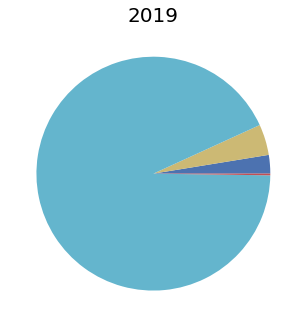

In [12]:
fig, ax= plt.subplots(figsize=(7,7))
plt.subplots_adjust(bottom=0.3)
plt.title('2019',fontsize=20)

labels = ["Russia",
          "Ucraina",
          "Resto del mondo",
          "Produzione",]

colors = sns.color_palette('deep')
plt.pie(wheat2019, colors = [colors[0],colors[8],colors[9],colors[3]])

patch1 = mpatches.Patch(color=colors[0], label=labels[0])
patch2 = mpatches.Patch(color=colors[8], label=labels[1])
patch3 = mpatches.Patch(color=colors[9], label=labels[2])
patch4 = mpatches.Patch(color=colors[3], label=labels[3])

#ax.legend(handles=[patch1,patch2,patch3,patch4],loc="center", bbox_to_anchor=(1.15,0.80))
plt.show()

In [42]:
fileImportTenero = pd.read_csv('GranoTeneroImportItalia.csv')

app2021 = fileImportTenero[fileImportTenero.Year == 2021]
totTenero2021 = app2021[app2021.Country == 'Mondo']['Tons'].values

app2020 = fileImportTenero[fileImportTenero.Year == 2020]
totTenero2020 = app2020[app2020.Country == 'Mondo']['Tons'].values

app2019 = fileImportTenero[fileImportTenero.Year == 2019]
totTenero2019 = app2019[app2019.Country == 'Mondo']['Tons'].values

fileImportTenero = fileImportTenero[fileImportTenero.Country != 'Mondo']

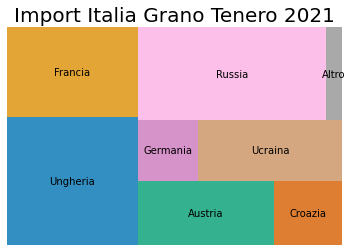

In [43]:
colors = sns.color_palette('colorblind')
size = fileImportTenero[fileImportTenero.Year == 2021]['Percentage'].values
size = np.append(size, 100 - sum(size))
label = fileImportTenero['Country'].unique()
label = np.append(label, 'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano Tenero 2021',fontsize=20)
plt.show()

In [44]:
fileImportDuro = pd.read_csv('GranoDuroImportItalia.csv',sep=';')

app2021 = fileImportDuro[fileImportDuro.Year == 2021]
totDuro2021 = app2021[app2021.Country == 'Mondo']['Tons'].values

app2020 = fileImportDuro[fileImportDuro.Year == 2020]
totDuro2020 = app2020[app2020.Country == 'Mondo']['Tons'].values

app2019 = fileImportDuro[fileImportDuro.Year == 2019]
totDuro2019 = app2019[app2019.Country == 'Mondo']['Tons'].values

fileImportDuro = fileImportDuro[fileImportDuro.Country != 'Mondo']
#totDuro

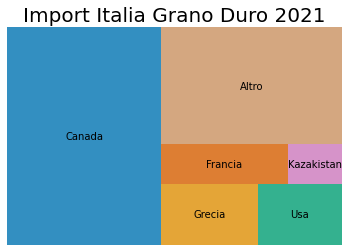

In [45]:
colors = sns.color_palette('colorblind')
size = fileImportDuro[fileImportDuro.Year == 2021]['Percentage'].values
size = np.append(size, 100 - sum(size))
label = fileImportDuro['Country'].unique()
label = np.append(label, 'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano Duro 2021',fontsize=20)
plt.show()

In [46]:
unionCountry = []
for el in fileImportDuro['Country'].unique():
    unionCountry.append(el)
        
for el in fileImportTenero['Country'].values:
    if el not in unionCountry:
        unionCountry.append(el)

unionCountry

['Canada',
 'Grecia',
 'Usa',
 'Francia',
 'Kazakistan',
 'Ungheria',
 'Austria',
 'Croazia',
 'Germania',
 'Ucraina',
 'Russia']

In [47]:
fileImportTenero2021 = fileImportTenero[fileImportTenero.Year == 2021]
for el in unionCountry:
    if el in fileImportTenero2021['Country'].unique():
        print(fileImportTenero2021[fileImportTenero2021.Country == el]['Percentage'].values)

[16]
[23]
[12]
[6]
[5]
[12]
[24]


In [48]:
fileImportTenero2021

,Year,Country,Tons,Percentage
22,2021,Ungheria,1031,23
23,2021,Francia,715,16
24,2021,Austria,536,12
25,2021,Croazia,254,6
26,2021,Germania,234,5
27,2021,Ucraina,488,12
28,2021,Russia,712,24


In [49]:
fileImportDuro2021 = fileImportDuro[fileImportDuro.Year == 2021]
for el in unionCountry:
    if el in fileImportDuro2021['Country'].unique():
        print(fileImportDuro2021[fileImportDuro2021.Country == el]['Percentage'].values)

[46]
[8]
[7]
[7]
[3]


In [50]:
granoDuro2021 = []
granoTenero2021 = []

for el in unionCountry:
    if el in fileImportDuro2021['Country'].values:
        granoDuro2021.append(fileImportDuro2021[fileImportDuro2021.Country == el]['Tons'].values[0])
        print(el)
    else:
        granoDuro2021.append(0)
    if el in fileImportTenero2021['Country'].values:
        granoTenero2021.append(fileImportTenero2021[fileImportTenero2021.Country == el]['Tons'].values[0])
    else:
        granoTenero2021.append(0)
        
print(granoDuro2021)
print(granoTenero2021)
print(unionCountry)

Canada
Grecia
Usa
Francia
Kazakistan
[1026, 181, 153, 150, 77, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 715, 0, 1031, 536, 254, 234, 488, 712]
['Canada', 'Grecia', 'Usa', 'Francia', 'Kazakistan', 'Ungheria', 'Austria', 'Croazia', 'Germania', 'Ucraina', 'Russia']


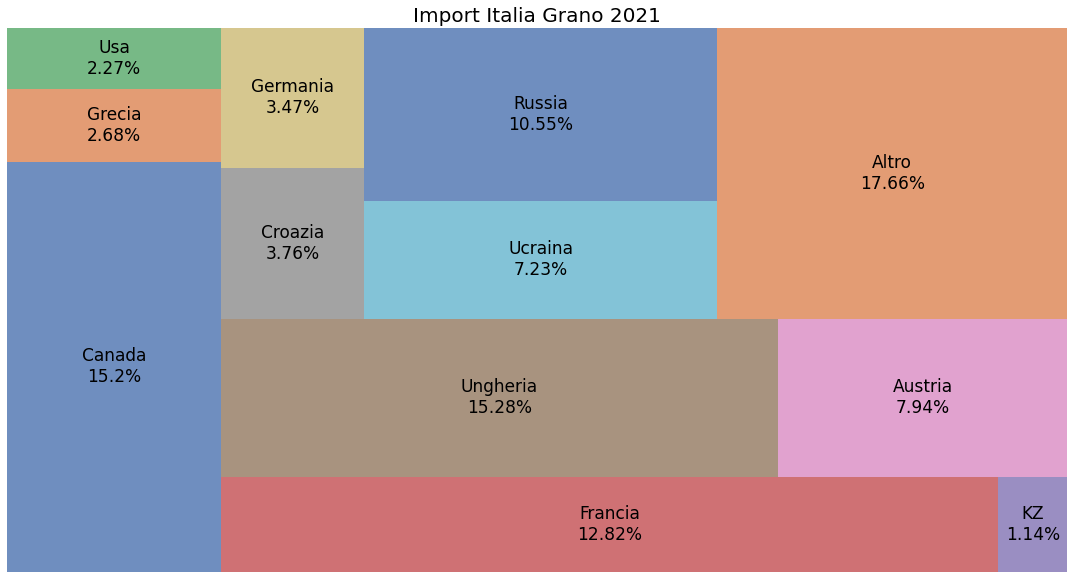

In [51]:
fig, ax= plt.subplots(figsize=(19,10))

colors = sns.color_palette('deep')
size = []

for el in range(len(granoDuro2021)):
    size.append(granoDuro2021[el] + granoTenero2021[el])
    
size = np.append(size, (totTenero2021 + totDuro2021) - sum(size))
label = np.append(unionCountry,'Altro')

label = ['KZ' if x=='Kazakistan' else x for x in label]
app = 0
for el in range(len(label)):
    label[el] = label[el] + '\n' + str(round((size[el]/(totTenero2021 + totDuro2021)*100)[0],2)) + "%"    
    
squarify.plot(sizes=size, label=label, alpha=.8, text_kwargs={'fontsize':17},color=colors )
plt.axis('off')
plt.title('Import Italia Grano 2021',fontsize=20)
plt.show()

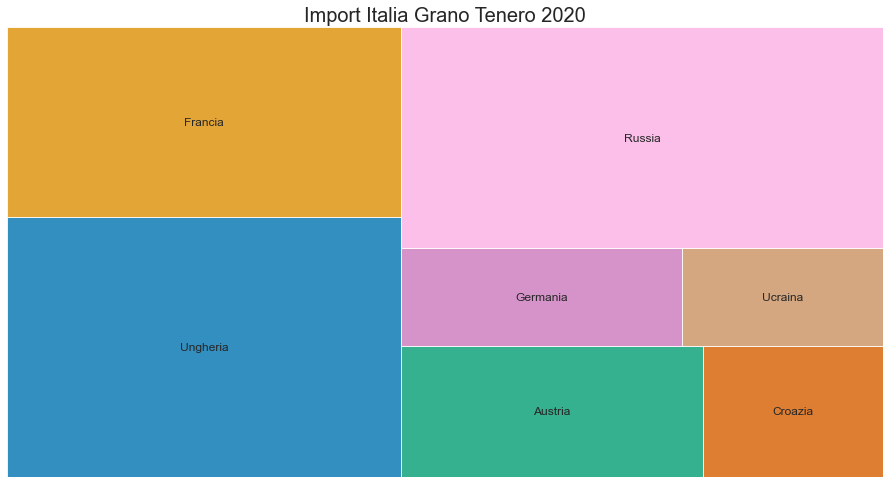

In [132]:
colors = sns.color_palette('colorblind')
size = fileImportTenero[fileImportTenero.Year == 2020]['Percentage'].values
size = np.append(size, 100 - sum(size))
label = fileImportTenero['Country'].unique()
label = np.append(label, 'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano Tenero 2020',fontsize=20)
plt.show()

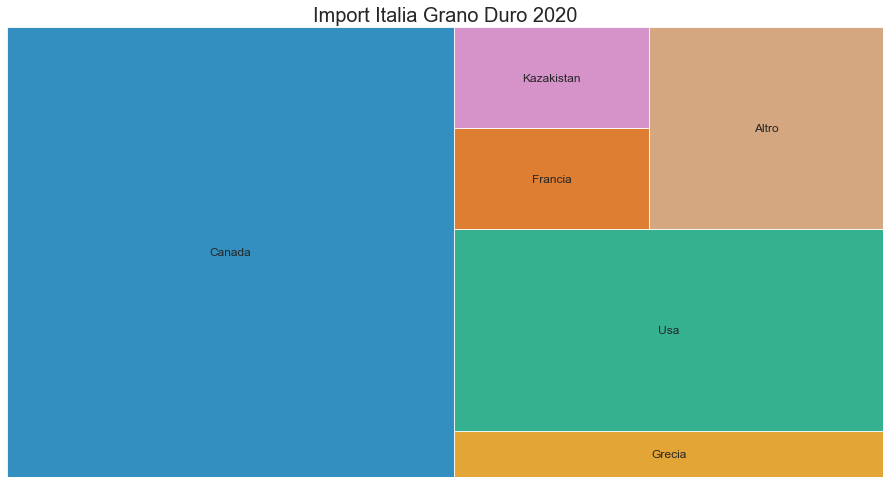

In [133]:
colors = sns.color_palette('colorblind')
size = fileImportDuro[fileImportDuro.Year == 2020]['Percentage'].values
size = np.append(size, 100 - sum(size))
label = fileImportDuro['Country'].unique()
label = np.append(label, 'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano Duro 2020',fontsize=20)
plt.show()

[19]
[26]
[10]
[6]
[7]
[5]
[51]
[5]
[22]
[5]
[5]
Canada
Grecia
Usa
Francia
Kazakistan


ZeroDivisionError: float division by zero

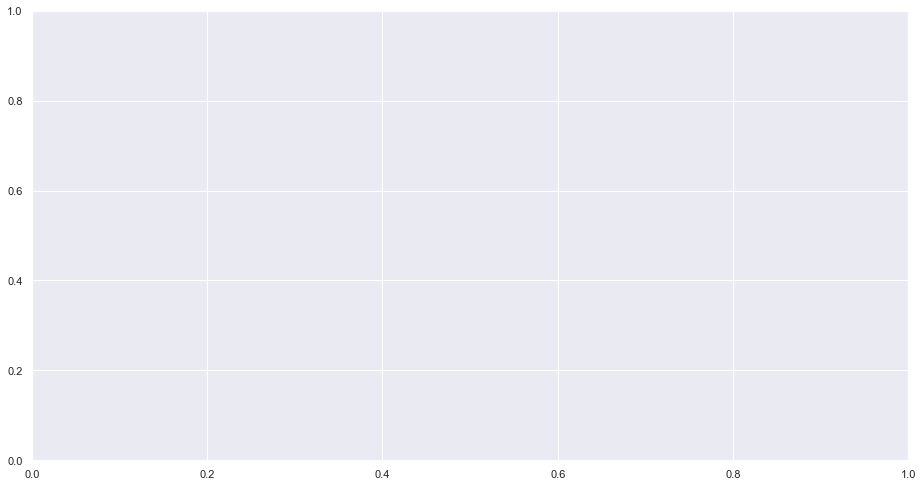

In [134]:
fileImportTenero2020= fileImportTenero[fileImportTenero.Year == 2020]
for el in unionCountry:
    if el in fileImportTenero2020['Country'].unique():
        print(fileImportTenero2020[fileImportTenero2020.Country == el]['Percentage'].values)
        
fileImportDuro2020 = fileImportDuro[fileImportDuro.Year == 2020]
for el in unionCountry:
    if el in fileImportDuro2020['Country'].unique():
        print(fileImportDuro2020[fileImportDuro2020.Country == el]['Percentage'].values)
        
granoDuro2020 = []
granoTenero2020 = []

for el in unionCountry:
    if el in fileImportDuro2020['Country'].values:
        granoDuro2020.append(fileImportDuro2020[fileImportDuro2020.Country == el]['Tons'].values[0])
        print(el)
    else:
        granoDuro2020.append(0)
    if el in fileImportTenero2020['Country'].values:
        granoTenero2020.append(fileImportTenero2020[fileImportTenero2020.Country == el]['Tons'].values[0])
    else:
        granoTenero2020.append(0)
        

colors = sns.color_palette('colorblind')
size = []

for el in range(len(granoDuro2020)):
    size.append(granoDuro2020[el] + granoTenero2020[el])
    
size = np.append(size, (totTenero2020 + totDuro2020) - sum(size))
label = np.append(unionCountry,'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano 2020',fontsize=20)
plt.show()

[19]
[21]
[11]
[3]
[7]
[5]
[33]
[6]
[19]
[17]
[6]
Canada
Grecia
Usa
Francia
Kazakistan


ZeroDivisionError: float division by zero

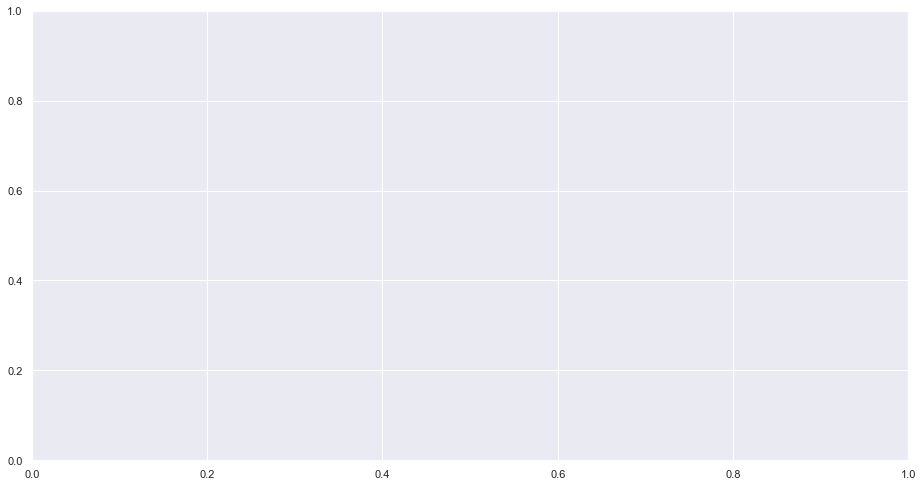

In [135]:
fileImportTenero2019 = fileImportTenero[fileImportTenero.Year == 2019]
for el in unionCountry:
    if el in fileImportTenero2019['Country'].unique():
        print(fileImportTenero2019[fileImportTenero2019.Country == el]['Percentage'].values)
        
fileImportDuro2019 = fileImportDuro[fileImportDuro.Year == 2019]
for el in unionCountry:
    if el in fileImportDuro2019['Country'].unique():
        print(fileImportDuro2019[fileImportDuro2019.Country == el]['Percentage'].values)
        
granoDuro2019 = []
granoTenero2019 = []

for el in unionCountry:
    if el in fileImportDuro2019['Country'].values:
        granoDuro2019.append(fileImportDuro2019[fileImportDuro2019.Country == el]['Tons'].values[0])
        print(el)
    else:
        granoDuro2019.append(0)
    if el in fileImportTenero2019['Country'].values:
        granoTenero2019.append(fileImportTenero2019[fileImportTenero2019.Country == el]['Tons'].values[0])
    else:
        granoTenero2019.append(0)
        

colors = sns.color_palette('colorblind')
size = []

for el in range(len(granoDuro2019)):
    size.append(granoDuro2019[el] + granoTenero2019[el])
    
size = np.append(size, (totTenero2019 + totDuro2019) - sum(size))
label = np.append(unionCountry,'Altro')
squarify.plot(sizes=size, label=label, alpha=.8, color=colors )
plt.axis('off')
plt.title('Import Italia Grano 2019',fontsize=20)
plt.show()

In [7]:
yearsC = ["2017","2018","2018","2020","2021"]
italiaConsumo = [
    13952,
    14321,
    14011,
    14544,
    14301
]  


In [8]:
fileUtile = fileProduzioneGranoItalia[fileProduzioneGranoItalia.Crop == 'Totals']
fileUtile = fileUtile.drop(['2010', '2011','2012','2013','2014','2015','2016'], axis=1)

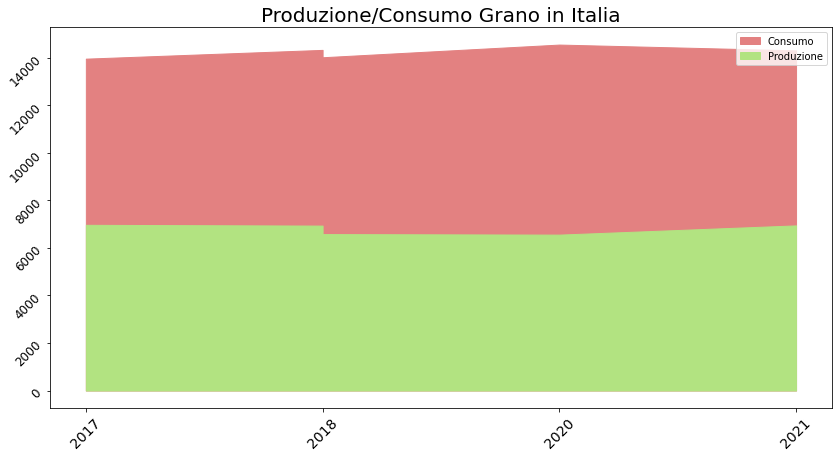

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [141]:
fig, ax= plt.subplots(figsize=(14,7))

x=yearsC
y1=italiaConsumo
#y2=fileUtile.loc[0]
#fileUtile[:len(fileUtile.values)]
y2=[6966, 6933, 6577, 6554, 6942]
colors = sns.color_palette('pastel')
plt.fill_between(yearsC, italiaConsumo, color='#e38181',label='Consumo')
plt.fill_between(yearsC, [6966, 6933, 6577, 6554, 6942], color='#b2e381', label='Produzione')
plt.title('Produzione/Consumo Grano in Italia',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.legend(loc='upper left')
plt.legend()
plt.show()
colors

In [4]:
fileProduzioneGranoUE = pd.read_csv('ProduzioneGranoUE.csv',sep=';')
fileProduzioneGranoUE

,Crop,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Totals,122413,124468,121066,132354,140740,144495,130316,137116,124518,139632,126689,138849,138720
1,Soft wheat,112969,115885,112652,124300,133042,136106,120641,128306,115751,132156,119270,131040,131090
2,Durum wheat,9443,8583,8414,8054,7698,8388,9675,8810,8767,7476,7420,7809,7630


In [5]:
fileConsumoGranoUE = pd.read_csv('ConsumoGranoUE.csv')
fileConsumoGranoUE

,Year,Tons
0,2017,111734
1,2018,111680
2,2019,105613
3,2020,102794
4,2021,103963


[137116, 124518, 139632, 126689, 138849]

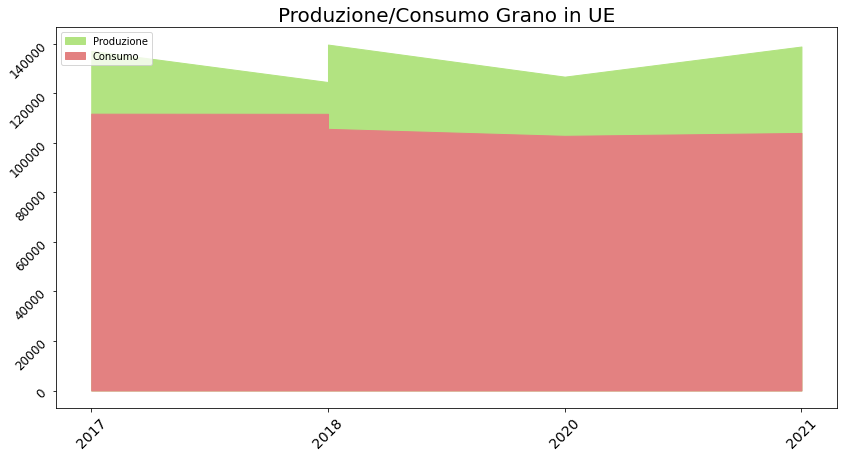

In [10]:
fig, ax= plt.subplots(figsize=(14,7))

x=fileProduzioneGranoUE.keys()[8:]
x=yearsC
y1=fileProduzioneGranoUE[fileProduzioneGranoUE.Crop == 'Totals'].values[0][8:-1]
y1=[137116, 124518, 139632, 126689, 138849]
y2=fileConsumoGranoUE['Tons'].values
plt.fill_between(yearsC, y1, color='#b2e381', label='Produzione')
plt.fill_between(yearsC, y2, color='#e38181',label='Consumo')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.title('Produzione/Consumo Grano in UE',fontsize=20)
plt.legend(loc='upper left')
y1

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
grainM = europa[europa.Item == 'Wheat']
it = grainM[grainM.Area == 'Italy']
fr = grainM[grainM.Area == 'France']
ge = grainM[grainM.Area == 'Germany']
sp = grainM[grainM.Area == 'Spain']
ru = grainM[grainM.Area == 'Russian Federation']
uk = grainM[grainM.Area == 'Ukraine']
allBox = pd.concat([it, fr, ge, sp, ru, uk], ignore_index=True)

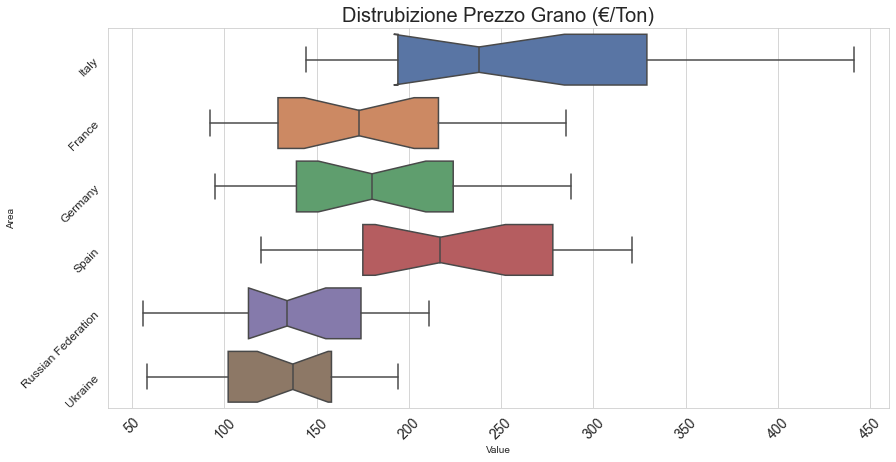

In [19]:
fig, ax = plt.subplots(figsize = (14,7))
#plt.grid()
plt.title('Distrubizione Prezzo Grano (€/Ton)',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.xlabel('')
plt.ylabel('')
sns.boxplot( x=allBox["Value"], y=allBox["Area"],notch=True ,palette='deep')
plt.show()

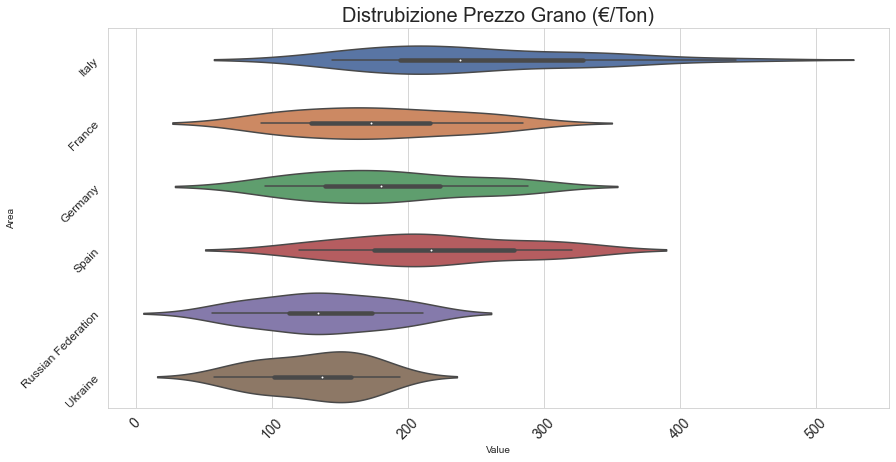

In [18]:
fig, ax = plt.subplots(figsize = (14,7))
sns.set_style('whitegrid')
#plt.grid()
plt.title('Distrubizione Prezzo Grano (€/Ton)',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.xlabel('')
plt.ylabel('')
sns.violinplot( x=allBox["Value"], y=allBox["Area"],palette='deep')
plt.show()

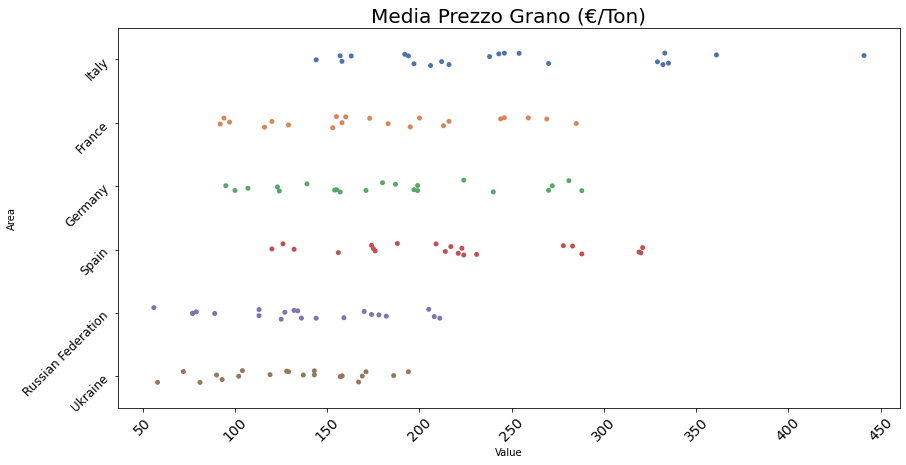

In [13]:
fig, ax = plt.subplots(figsize = (14,7))
#plt.grid()
plt.title('Distrubizione Prezzo Grano (€/Ton)',fontsize=20)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.xlabel('')
plt.ylabel('')
ax = sns.stripplot(x=allBox["Value"],y=allBox["Area"],palette='deep')
# sns.violinplot( x=allBox["Value"], y=allBox["Area"],palette='deep')
plt.show()

In [31]:
fileRussiaUk = pd.read_csv('DataSetExportRU-UK.csv')
fileRussiaUk

,From,Where,Amount,Quantity
0,Russia,Egitto,2448.00,bn
1,Russia,Turchia,134.40,bn
2,Russia,Bangladesh,504.00,m
3,Russia,Nigeria,378.24,m
4,Russia,Yemen,304.32,m
5,Russia,Azerbaijan,253.44,m
6,Ucraina,Egitto,657.60,m
7,Ucraina,Turchia,198.72,m
8,Ucraina,Indonesia,578.88,m
9,Ucraina,Filippine,232.32,m


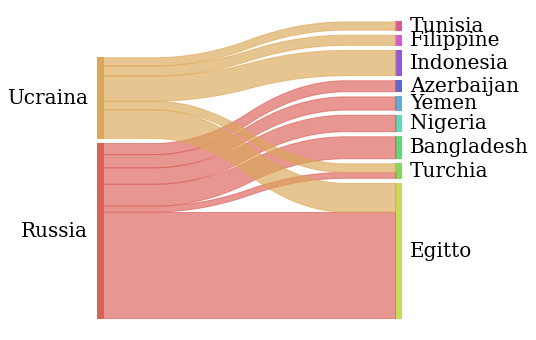

In [33]:
sankey(
    left=fileRussiaUk["From"], right=fileRussiaUk["Where"], 
    leftWeight=fileRussiaUk["Amount"], rightWeight=fileRussiaUk["Amount"], 
    aspect=20, fontsize=20
)

In [24]:
df

,Unnamed: 0,customer,good,revenue
0,0,John,fruit,5.5
1,1,Mike,meat,11.0
2,2,Betty,drinks,7.0
3,3,Ben,fruit,4.0
4,4,Betty,bread,2.0
5,5,John,bread,2.5
6,6,John,drinks,8.0
7,7,Ben,bread,2.0
8,8,Mike,bread,3.5
9,9,John,meat,13.0
